In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [10]:
stock = 'TSLA'
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 8, 1)
tsla = yf.download(stock, start=start, end=end, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [11]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [12]:
tsla_filtered = tsla[['Open', 'High', 'Low', 'Volume']]
X = tsla_filtered
y = tsla['Close']

In [13]:
train_len = int(len(tsla)*0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
sarimax = SARIMAX(y_train, exog=X_train, order=(8, 1, 8))
sarimax_results = sarimax.fit(disp=0)

In [17]:
start = len(X_train)
end = len(X_train) + len(X_test) - 1

In [18]:
sarima_pred = sarimax_results.predict(start, end, exog=X_test)
sarima_pred.index = X_test.index

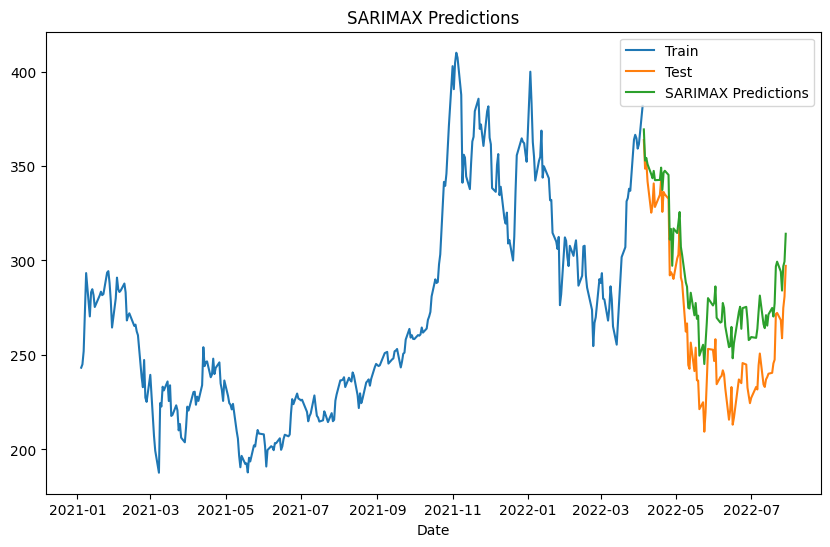

In [20]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(sarima_pred, label='SARIMAX Predictions')
plt.title('SARIMAX Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mae_sarimax = mean_absolute_error(y_test, sarima_pred)
mse_sarimax = mean_squared_error(y_test, sarima_pred)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, sarima_pred))

In [26]:
sarimax_perf = {'mae_sarimax': mae_sarimax,
                'mse_sarimax': mse_sarimax,
                'rmse_sarimax': rmse_sarimax}
sarimax_perf = pd.DataFrame([sarimax_perf])
sarimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,24.977419,717.857967,26.792872


In [28]:
sarimax_model = SARIMAX(y, order=(8, 1, 8))
sarimax_results = sarimax_model.fit(disp=0)

In [30]:
sarimax_forecast = sarimax_results.forecast(steps=10, exog=X_test.iloc[-10:])
forecast_index = pd.date_range(y.index[-1], periods=10)
sarimax_forecast.index = forecast_index

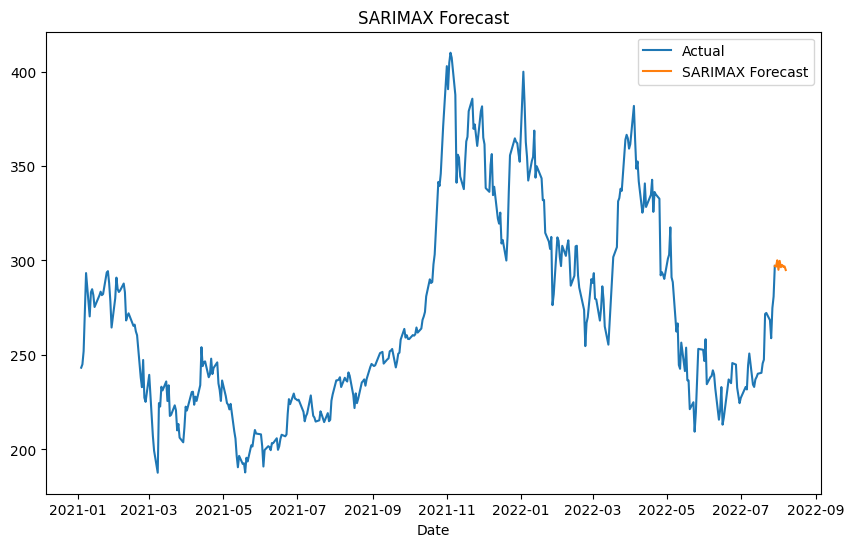

In [32]:
plt.plot(tsla['Close'], label='Actual')
plt.plot(sarimax_forecast, label='SARIMAX Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

### Same procedure as SARIMAX for ARMA, ARIMA, SARIMA. Compare the mae, mse and rmse for choosing model.